In [135]:
import pandas as pd
import re
from langdetect import detect

# ÏâºÌëúÍ∞Ä Ìè¨Ìï®Îêú CSV ÌååÏùº ÏùΩÍ∏∞ - Î™®Îì† ÌïÑÎìúÎ•º ÌïòÎÇòÏùò Ïª¨ÎüºÏúºÎ°ú Ï≤òÎ¶¨
df = pd.read_csv('.data/squid_game_reviews.csv',
                 header=0,  # Ï≤´ Ï§ÑÏùÑ Ìó§ÎçîÎ°ú ÏÇ¨Ïö©
                 quoting=1,  # QUOTE_ALL - Îî∞Ïò¥ÌëúÎ°ú Í∞êÏã∏ÏßÑ ÌïÑÎìú Ï≤òÎ¶¨
                 on_bad_lines='skip')  # Î¨∏Ï†ú ÏûàÎäî Ï§ÑÏùÄ Í±¥ÎÑàÎõ∞Í∏∞

print(f"Ï†ÑÏ≤¥ Î¶¨Î∑∞: {len(df)}Í∞ú")

# Ïñ∏Ïñ¥ Í∞êÏßÄ Ìï®Ïàò
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

df['language'] = df['review_text'].apply(detect_language)
df = df[df['language'] == 'en'].copy()

print(f"ÏòÅÏñ¥ Î¶¨Î∑∞: {len(df)}Í∞ú")
df_review = df[['review_text']].copy()
df_review['review_text'] = df_review['review_text'].str.lower()

print("\nÏ≤´ 10Í∞ú ÏÉòÌîå:")
print(df_review.head(10))

Ï†ÑÏ≤¥ Î¶¨Î∑∞: 897Í∞ú
ÏòÅÏñ¥ Î¶¨Î∑∞: 852Í∞ú

Ï≤´ 10Í∞ú ÏÉòÌîå:
                                         review_text
0  masterpiece on all levels like nothing else on...
1  amazing show with thrill and suspense througho...
2         great story and characters.a lot to enjoy.
3  a strong message with a powerful plot. absolut...
4  a brilliant season in everything. every detail...
5  one of the most original shows i‚Äôve seen in years
6  one of the most inventive and well-crafted tel...
7  this show really gets how the human mind works...
8  squid game season 1 remains a great series wit...
9  the first season of squid game is a masterpiec...


In [136]:
df_review['review_text'] = df_review['review_text'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))
df_review.head(10)

review_text
0  masterpiece on all levels like nothing else on...
1  amazing show with thrill and suspense througho...
2           great story and charactersa lot to enjoy
3  a strong message with a powerful plot absolute...
4  a brilliant season in everything every detail ...
5   one of the most original shows ive seen in years
6  one of the most inventive and wellcrafted tele...
7  this show really gets how the human mind works...
8  squid game season 1 remains a great series wit...
9  the first season of squid game is a masterpiec...

In [137]:
print(f"Ï¥ù Î¶¨Î∑∞ Ïàò: {len(df_review)}")
full_reviews = df_review['review_text'].isna()
print(f'empty_reviews : {full_reviews.sum()}')

Ï¥ù Î¶¨Î∑∞ Ïàò: 852
empty_reviews : 0


In [138]:
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"Ïó¨Îü¨ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞: {multiple_spaces.sum()}Í∞ú")
if multiple_spaces.sum() > 0:
    print("ÏòàÏãú:")
    print(df_review[multiple_spaces]['review_text'].head(10))

Ïó¨Îü¨ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞: 73Í∞ú
ÏòàÏãú:
13     despite having some intense scenes with an int...
41     squid game s1 offers creative storytelling com...
45                  greatest show on netflix  hands down
52     squid game season 1 exploded onto the global s...
76     this season gripped onto the main plot  the ri...
101                              best movie of 2021  sad
114    this was awesome i loved it such a good season...
123    season average 8222 lets begin with this extre...
135    a must see show  very good idea and execution ...
137    an amazingly creative dark satire on class exp...
Name: review_text, dtype: object


In [139]:
df_review['review_text'] = df_review['review_text'].str.replace(r'\s+',' ')
multiple_spaces = df_review['review_text'].str.contains("  ")
print(f"Ïó¨Îü¨ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞: {multiple_spaces.sum()}Í∞ú")
if multiple_spaces.sum() > 0:
    print("ÏòàÏãú:")
    print(df_review[multiple_spaces]['review_text'].head(3))

Ïó¨Îü¨ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞: 73Í∞ú
ÏòàÏãú:
13    despite having some intense scenes with an int...
41    squid game s1 offers creative storytelling com...
45                 greatest show on netflix  hands down
Name: review_text, dtype: object


In [140]:
leading_spaces = df_review['review_text'].str.match(r'^\s')
print(f"Ïïû Í≥µÎ∞±: {leading_spaces.sum()}Í∞ú")
if leading_spaces.sum() > 0:
    print("\nÏïû Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:")
    print(df_review[leading_spaces]['review_text'])

Ïïû Í≥µÎ∞±: 3Í∞ú

Ïïû Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:
147     7910 very very very watchable i watched episo...
638     this show had me i was gripped the entire tim...
713     wildly entertaining this south korean surviva...
Name: review_text, dtype: object


In [141]:
trailing_spaces = df_review['review_text'].str.match(r'\s$')
print(f"Îí§ Í≥µÎ∞±: {trailing_spaces.sum()}Í∞ú")
if trailing_spaces.sum() > 0:
    print("\nÎí§ Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:")
    print(df_review[trailing_spaces]['review_text'])

Îí§ Í≥µÎ∞±: 0Í∞ú


In [142]:
both_spaces = leading_spaces | trailing_spaces
print(f"ÏïûÎí§ Í≥µÎ∞± Ï¥ù: {both_spaces.sum()}Í∞ú")
if both_spaces.sum() > 0:
    print("\nÏïû Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:")
    print(df_review[both_spaces]['review_text'])

ÏïûÎí§ Í≥µÎ∞± Ï¥ù: 3Í∞ú

Ïïû Í≥µÎ∞±Ïù¥ ÏûàÎäî Î¶¨Î∑∞:
147     7910 very very very watchable i watched episo...
638     this show had me i was gripped the entire tim...
713     wildly entertaining this south korean surviva...
Name: review_text, dtype: object


In [143]:
df_review['review_text'] = df_review['review_text'].str.strip()

In [144]:
both_spaces = df_review['review_text'].str.match(r'^\s|\s$')
print(f"Ï†úÍ±∞ ÌõÑ: {both_spaces.sum()}Í∞ú")

Ï†úÍ±∞ ÌõÑ: 0Í∞ú


In [145]:
# min_words = df_review['review_text'].str.split().str.len()
# print(f"Îã®Ïñ¥ 1-2Í∞ú Î¶¨Î∑∞: {(min_words < 3).sum()}Í∞ú")
# df_review = df_review[min_words >= 3]
# print(df_review[min_words <= 3])

In [146]:
# import os
# from pathlib import Path
# from datetime import datetime

# # ÌòÑÏû¨ ÏûëÏóÖ ÎîîÎ†âÌÜ†Î¶¨ ÌôïÏù∏
# print(f"ÌòÑÏû¨ ÏûëÏóÖ ÎîîÎ†âÌÜ†Î¶¨: {os.getcwd()}")

# # Ï†ÄÏû• Í≤ΩÎ°úÎ•º Î™ÖÏãúÏ†ÅÏúºÎ°ú ÏßÄÏ†ï
# output_path = Path(os.getcwd()) / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"

# try:
#     # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ÄÏû•
#     df_review.to_csv(output_path, index=False, encoding='utf-8-sig')  # BOM Ï∂îÍ∞ÄÎ°ú Excel Ìò∏ÌôòÏÑ± Í∞úÏÑ†
#     print(f"‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å Î∞è Ï†ÄÏû•: {output_path}")
#     print(f"üìä Ï†ÄÏû•Îêú Ìñâ Ïàò: {len(df_review)}")
# except Exception as e:
#     print(f"‚ùå Ï†ÄÏû• Ïã§Ìå®: {e}")
#     # ÎåÄÏïà: Ìôà ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•
#     home_path = Path.home() / "Documents" / f"preprocessed_reviews_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
#     df_review.to_csv(home_path, index=False, encoding='utf-8-sig')
#     print(f"‚úÖ ÎåÄÏ≤¥ Í≤ΩÎ°úÏóê Ï†ÄÏû•: {home_path}")

In [147]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

df = df_review.copy()
df['tokens'] = df['review_text'].apply(word_tokenize)
print(df[['review_text', 'tokens']].head(10))

                                         review_text  \
0  masterpiece on all levels like nothing else on...   
1  amazing show with thrill and suspense througho...   
2           great story and charactersa lot to enjoy   
3  a strong message with a powerful plot absolute...   
4  a brilliant season in everything every detail ...   
5   one of the most original shows ive seen in years   
6  one of the most inventive and wellcrafted tele...   
7  this show really gets how the human mind works...   
8  squid game season 1 remains a great series wit...   
9  the first season of squid game is a masterpiec...   

                                              tokens  
0  [masterpiece, on, all, levels, like, nothing, ...  
1  [amazing, show, with, thrill, and, suspense, t...  
2   [great, story, and, charactersa, lot, to, enjoy]  
3  [a, strong, message, with, a, powerful, plot, ...  
4  [a, brilliant, season, in, everything, every, ...  
5  [one, of, the, most, original, shows, ive, see... 

In [148]:
import nltk
from nltk.corpus import stopwords
import contractions

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'movies', 'squid',
                    'animated', 'im', 'ive', 'ill', 'id', 'dont',
                     'cant', 'wont', 'youre', 'theyre']
stop_words.update(extra_stop_words)
stop_words_list = list(stop_words)
# print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
df['filtered_tokens'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop_words])
print(df['filtered_tokens'])

0      [masterpiece, levels, like, nothing, else, one...
1      [amazing, show, thrill, suspense, throughout, ...
2                [great, story, charactersa, lot, enjoy]
3       [strong, message, powerful, plot, absolute, see]
4      [brilliant, season, everything, every, detail,...
                             ...                        
892    [strange, violent, disturbing, adventure, soun...
893    [game, doesnt, offer, escape, horrors, real, w...
894    [overall, still, savagely, entertaining, slam,...
895    [thematic, intelligence, aside, game, also, wh...
896    [aside, stretched, touch, thin, spots, say, ga...
Name: filtered_tokens, Length: 852, dtype: object


In [150]:
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [151]:
# from nltk.stem import LancasterStemmer
# stemmer = LancasterStemmer()
# result = []
# for tokens in df['filtered_tokens']:
#     stemmed = [stemmer.stem(token) for token in tokens]
#     result.append(stemmed)
# print(result)

In [152]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
result = []
for tokens in df['filtered_tokens']:
    lemma = [lemmatizer.lemmatize(token) for token in tokens]
    result.append(lemma)
print(result)

[['masterpiece', 'level', 'like', 'nothing', 'else', 'one', 'show', 'must', 'see', 'die'], ['amazing', 'show', 'thrill', 'suspense', 'throughout', 'kept', 'edge', 'seat', 'way'], ['great', 'story', 'charactersa', 'lot', 'enjoy'], ['strong', 'message', 'powerful', 'plot', 'absolute', 'see'], ['brilliant', 'season', 'everything', 'every', 'detail', 'absolutely', 'gorgeous', 'watch', 'forever', 'believe', 'continuation'], ['one', 'original', 'show', 'seen', 'year'], ['one', 'inventive', 'wellcrafted', 'television', 'show', 'ever', 'changed', 'game', 'opened', 'way', 'international', 'production'], ['show', 'really', 'get', 'human', 'mind', 'work', 'best', 'thing', 'show', 'offer', 'character', 'wow', 'character', 'interesting', 'complex', 'somehow', 'relatable', 'somehow', 'character', 'get', 'even', 'better', 'season', '23', 'best', 'show', 'ever', 'seen'], ['game', 'season', '1', 'remains', 'great', 'series', 'plot', 'still', 'grab', 'attention', 'today', 'beginning', 'end', 'game', 'sh

In [153]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chany\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [154]:
df['pos_tags'] = df['filtered_tokens'].apply(lambda x: nltk.pos_tag(x))
print("POS ÌÉúÍπÖ Í≤∞Í≥º (ÏÉÅÏúÑ 10Í∞ú):")
print(df[['review_text', 'pos_tags']].head(10))

POS ÌÉúÍπÖ Í≤∞Í≥º (ÏÉÅÏúÑ 10Í∞ú):
                                         review_text  \
0  masterpiece on all levels like nothing else on...   
1  amazing show with thrill and suspense througho...   
2           great story and charactersa lot to enjoy   
3  a strong message with a powerful plot absolute...   
4  a brilliant season in everything every detail ...   
5   one of the most original shows ive seen in years   
6  one of the most inventive and wellcrafted tele...   
7  this show really gets how the human mind works...   
8  squid game season 1 remains a great series wit...   
9  the first season of squid game is a masterpiec...   

                                            pos_tags  
0  [(masterpiece, NN), (levels, NNS), (like, IN),...  
1  [(amazing, VBG), (show, NN), (thrill, NN), (su...  
2  [(great, JJ), (story, NN), (charactersa, NN), ...  
3  [(strong, JJ), (message, NN), (powerful, JJ), ...  
4  [(brilliant, JJ), (season, NN), (everything, N...  
5  [(one, CD), (ori

In [155]:
import pandas as pd
from datetime import datetime

# --- Ï†ÑÏ≤òÎ¶¨ Îç∞Ïù¥ÌÑ∞ CSV Ï†ÄÏû• (Í∞ÑÎã® Î≤ÑÏ†Ñ) ---

df_complete = df[['review_text', 'filtered_tokens', 'pos_tags']].copy()

# Í∞Å Ïª¨ÎüºÏùÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
df_complete['filtered_tokens_str'] = df_complete['filtered_tokens'].apply(lambda x: ' '.join(x))
df_complete['pos_tags_str'] = df_complete['pos_tags'].apply(
    lambda tags: ' '.join([f"{token}/{tag}" for token, tag in tags])
)

# ÏµúÏ¢Ö Ï†ÄÏû• (Î¶¨Ïä§Ìä∏ Ïª¨Îüº Ï†úÏô∏, 3Í∞ú Ïª¨ÎüºÎßå)
df_final_complete = df_complete[[
    'review_text', 
    'filtered_tokens_str', 
    'pos_tags_str'
]]

# CSV ÌååÏùºÎ°ú Ï†ÄÏû•
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
output_file = f'preprocessed_parasite_complete_{timestamp}.csv'

df_final_complete.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å Î∞è Ï†ÄÏû•: {output_file}")
print(f"üìä Ï†ÄÏû•Îêú Ìñâ Ïàò: {len(df_final_complete)}")
print(f"\nüìã Ï†ÄÏû•Îêú Ïª¨Îüº:")
for i, col in enumerate(df_final_complete.columns, 1):
    print(f"  {i}. {col}")

print(f"\nüìÑ Ï≤´ 3Í∞ú ÏÉòÌîå:")
print(df_final_complete.head(3))

‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å Î∞è Ï†ÄÏû•: preprocessed_parasite_complete_20251019_230232.csv
üìä Ï†ÄÏû•Îêú Ìñâ Ïàò: 852

üìã Ï†ÄÏû•Îêú Ïª¨Îüº:
  1. review_text
  2. filtered_tokens_str
  3. pos_tags_str

üìÑ Ï≤´ 3Í∞ú ÏÉòÌîå:
                                         review_text  \
0  masterpiece on all levels like nothing else on...   
1  amazing show with thrill and suspense througho...   
2           great story and charactersa lot to enjoy   

                                 filtered_tokens_str  \
0  masterpiece levels like nothing else one shows...   
1  amazing show thrill suspense throughout kept e...   
2                  great story charactersa lot enjoy   

                                        pos_tags_str  
0  masterpiece/NN levels/NNS like/IN nothing/NN e...  
1  amazing/VBG show/NN thrill/NN suspense/NN thro...  
2   great/JJ story/NN charactersa/NN lot/NN enjoy/NN  


In [156]:
my_tag_set = ['NN','NNS', 'NNP']
filtered_tokens = [token for tags in df['pos_tags'] for token, tag in tags if tag in my_tag_set]

word_cnt_filtered = dict()
for word in filtered_tokens:
    word_cnt_filtered[word] = word_cnt_filtered.get(word, 0) + 1

sorted_word_cnt_filtered = sorted(word_cnt_filtered, key=word_cnt_filtered.get, reverse=True)
print(sorted_word_cnt_filtered[:20])

['show', 'game', 'series', 'season', 'characters', 'games', 'story', 'people', 'watch', 'plot', 'time', 'episode', 'character', 'end', 'life', 'way', 'tv', 'episodes', 'shows', 'everything']


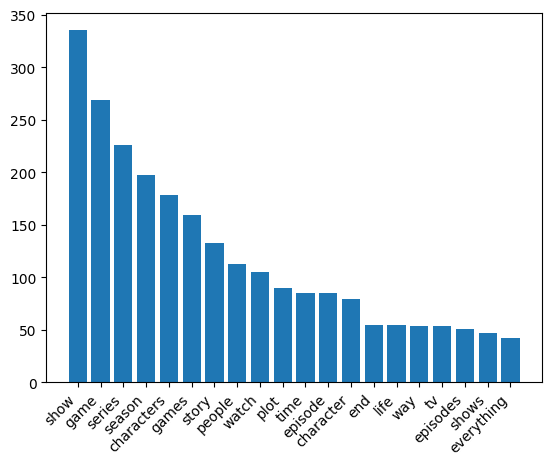

In [157]:
from wordcloud import WordCloud
import matplotlib.pylab as plt
key = sorted_word_cnt_filtered[:20]
cnt = [word_cnt_filtered[k] for k in key]

plt.bar(range(len(key)), cnt, tick_label=key)
plt.xticks(rotation=45, ha='right')
plt.show()

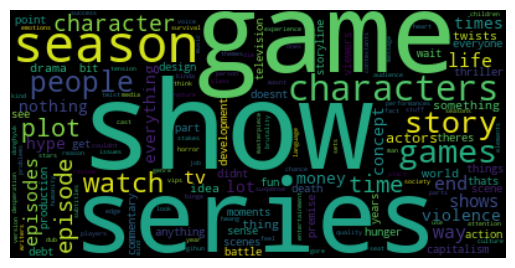

In [158]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate_from_frequencies(word_cnt_filtered)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

ÏòÅÏñ¥ Î¶¨Î∑∞: 851Í∞ú


c:\dataintelligence\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



--- ÏµúÏ¢Ö Ï†ïÏ†úÎêú ÌÜ†ÌÅ∞ ÏÉÅÏúÑ ÌÇ§ÏõåÎìú ÎπÑÍµê (Îã®Ïñ¥Îßå Ï∂úÎ†•) ---

[CountVectorizer ÏÉÅÏúÑ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏]
['game', 'show', 'character', 'series', 'season', 'story', 'episode', 'time', 'people', 'watch', 'plot', 'life', 'end', 'way', 'tv', 'thing', 'lot', 'twist', 'hype', 'everything']

[TfidfVectorizer ÏÉÅÏúÑ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏]
['show', 'game', 'season', 'series', 'character', 'story', 'episode', 'watch', 'time', 'plot', 'people', 'tv', 'hype', 'end', 'life', 'thing', 'way', 'lot', 'idea', 'violence']


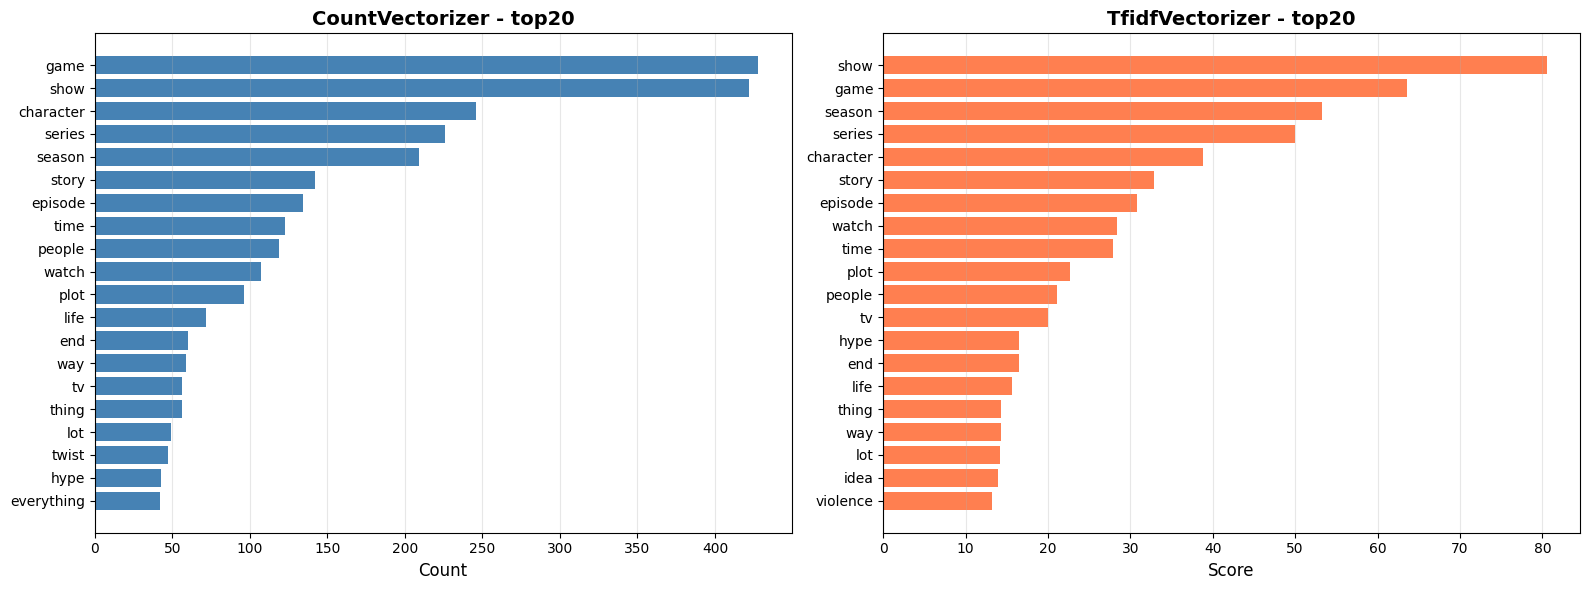

In [159]:
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from langdetect import detect

# CSV ÌååÏùº ÏùΩÍ∏∞
df = pd.read_csv('.data/squid_game_reviews.csv')

# Ïñ∏Ïñ¥ Í∞êÏßÄ Ìï®Ïàò
def detect_language(text):
    try:
        return detect(str(text))
    except:
        return None

# ÏòÅÏñ¥ Î¶¨Î∑∞Îßå ÌïÑÌÑ∞ÎßÅ
df['language'] = df['review_text'].apply(detect_language)
df_review = df[df['language'] == 'en'].copy()
print(f"ÏòÅÏñ¥ Î¶¨Î∑∞: {len(df_review)}Í∞ú")

# Stopwords ÏÑ§Ï†ï
stop_words = set(stopwords.words('english'))
extra_stop_words = ['movie', 'netflix', 'film', 'movies', 'squid',
                    'animated', 'im', 'ive', 'ill', 'id', 'dont',
                     'cant', 'wont', 'youre', 'theyre']
stop_words.update(extra_stop_words)

# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
lemmatizer = WordNetLemmatizer()
my_tag_set = {'NN', 'NNS', 'NNP'}

def preprocess_text(text):
    # 1. ÏÜåÎ¨∏Ïûê Î≥ÄÌôò Î∞è ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ (ÏòÅÎ¨∏Ïûê, Ïà´Ïûê, Í≥µÎ∞±Îßå Ïú†ÏßÄ)
    text = re.sub(r'[^a-z0-9\s]', '', text.lower())

    # 2. ÌÜ†ÌÅ∞Ìôî
    tokens = word_tokenize(text)

    # 3. Stopwords Ï†úÍ±∞ Î∞è Í∏∏Ïù¥ ÌïÑÌÑ∞ÎßÅ
    filtered_tokens = [token for token in tokens if token not in stop_words and len(token) > 1]

    # 4. Lemmatization (ÌëúÏ†úÏñ¥ Ï∂îÏ∂ú)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # 5. POS Tagging & ÌïÑÌÑ∞ÎßÅ
    pos_tags = pos_tag(lemmatized_tokens)
    final_tokens = [token for token, tag in pos_tags if tag in my_tag_set]

    return final_tokens

df_review['final_tokens'] = df_review['review_text'].apply(preprocess_text)


vectorizer_config = {
    'tokenizer': lambda x: x,
    'lowercase': False,
    'max_features': 500
}

# CountVectorizer Ïã§Ìñâ
cv = CountVectorizer(**vectorizer_config)
cv_matrix = cv.fit_transform(df_review['final_tokens'])
cv_top_features = cv.get_feature_names_out()

# TfidfVectorizer Ïã§Ìñâ
tfidf = TfidfVectorizer(**vectorizer_config)
tfidf_matrix = tfidf.fit_transform(df_review['final_tokens'])
tfidf_top_features = tfidf.get_feature_names_out()

# --- Í∞Å ÌñâÎ†¨Ïùò Îã®Ïñ¥Î≥Ñ Ï¥ùÌï©ÏùÑ Í≥ÑÏÇ∞ÌïòÏó¨ Ï§ëÏöîÎèÑ ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÎäî Ìï®Ïàò ---
def get_top_n_features(feature_names, matrix, n=20):
    # Í∞Å Îã®Ïñ¥(feature)Ïùò Ï†êÏàòÎ•º Î™®Îëê ÎçîÌï©ÎãàÎã§.
    sum_features = matrix.sum(axis=0)

    # Îã®Ïñ¥ Ïù¥Î¶ÑÍ≥º Ï†êÏàòÎ•º ÏßùÏßÄÏñ¥ DataFrameÏúºÎ°ú ÎßåÎì≠ÎãàÎã§.
    features_df = pd.DataFrame(sum_features, columns=feature_names).T
    features_df.columns = ['score']

    # Ï†êÏàòÍ∞Ä ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨ÌïòÏó¨ ÏÉÅÏúÑ nÍ∞úÎ•º Î∞òÌôòÌï©ÎãàÎã§.
    return features_df.sort_values(by='score', ascending=False).head(n)

# --- 5. Í≤∞Í≥º Ï∂úÎ†• (Îã®Ïñ¥ Î¶¨Ïä§Ìä∏Îßå) ---
print("\n--- ÏµúÏ¢Ö Ï†ïÏ†úÎêú ÌÜ†ÌÅ∞ ÏÉÅÏúÑ ÌÇ§ÏõåÎìú ÎπÑÍµê (Îã®Ïñ¥Îßå Ï∂úÎ†•) ---")

# CountVectorizer Í≤∞Í≥º (Îã®Ïàú ÎπàÎèÑ Ìï©Í≥Ñ Í∏∞Ï§Ä)
cv_top_keywords = get_top_n_features(cv_top_features, cv_matrix)
print("\n[CountVectorizer ÏÉÅÏúÑ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏]")
print(cv_top_keywords.index.tolist()) # .index.tolist() Ï∂îÍ∞Ä!


# TfidfVectorizer Í≤∞Í≥º (TF-IDF Ï†êÏàò Ìï©Í≥Ñ Í∏∞Ï§Ä)
tfidf_top_keywords = get_top_n_features(tfidf_top_features, tfidf_matrix)
print("\n[TfidfVectorizer ÏÉÅÏúÑ Îã®Ïñ¥ Î¶¨Ïä§Ìä∏]")
print(tfidf_top_keywords.index.tolist()) # .index.tolist() Ï∂îÍ∞Ä!

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# CountVectorizer ÎßâÎåÄ Í∑∏ÎûòÌîÑ
cv_words = cv_top_keywords.index.tolist()
cv_scores = cv_top_keywords['score'].tolist()

ax1.barh(cv_words[::-1], cv_scores[::-1], color='steelblue')
ax1.set_xlabel('Count', fontsize=12)
ax1.set_title('CountVectorizer - top20', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

# TfidfVectorizer ÎßâÎåÄ Í∑∏ÎûòÌîÑ
tfidf_words = tfidf_top_keywords.index.tolist()
tfidf_scores = tfidf_top_keywords['score'].tolist()

ax2.barh(tfidf_words[::-1], tfidf_scores[::-1], color='coral')
ax2.set_xlabel('Score', fontsize=12)
ax2.set_title('TfidfVectorizer - top20', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [160]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from langdetect import detect
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

id2word = corpora.Dictionary(df_review['final_tokens'])

corpus = [id2word.doc2bow(tokens) for tokens in df_review['final_tokens']]

# LDA Î™®Îç∏ ÏÉùÏÑ±
lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=5,
    random_state=100, # Í≤∞Í≥º Ïû¨ÌòÑÏÑ±ÏùÑ ÏúÑÌïú ÏÑ§Ï†ï
    update_every=1,
    chunksize=100,
    passes=10, # Ï†ÑÏ≤¥ ÏΩîÌçºÏä§Î•º Î™á Î≤à Î∞òÎ≥µ ÌïôÏäµÌï†ÏßÄ Í≤∞Ï†ï
    alpha='auto',
    per_word_topics=True
)

print("LDA Î™®Îç∏ ÌïôÏäµÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")


# --- 4. Í≤∞Í≥º ÌôïÏù∏ Î∞è ÏãúÍ∞ÅÌôî ---

# 4-1. ÌÖçÏä§Ìä∏Î°ú ÌÜ†ÌîΩ ÌôïÏù∏
print("\n--- Í∞Å ÌÜ†ÌîΩÎ≥Ñ Ï£ºÏöî Îã®Ïñ¥ ---")
topics = lda_model.print_topics(num_words=10) # Í∞Å ÌÜ†ÌîΩÎ≥ÑÎ°ú 10Í∞ú Îã®Ïñ¥ Ï∂úÎ†•
for topic in topics:
    print(topic)

# 4-2. pyLDAvisÎ•º ÏÇ¨Ïö©Ìïú Ïù∏ÌÑ∞ÎûôÌã∞Î∏å ÏãúÍ∞ÅÌôî
print("\nLDA ÏãúÍ∞ÅÌôî Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ≥† 'lda_visualization.html' ÌååÏùºÎ°ú Ï†ÄÏû•Ìï©ÎãàÎã§.")
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis_data

LDA Î™®Îç∏ ÌïôÏäµÏù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.

--- Í∞Å ÌÜ†ÌîΩÎ≥Ñ Ï£ºÏöî Îã®Ïñ¥ ---
(0, '0.075*"series" + 0.049*"watch" + 0.033*"end" + 0.031*"episode" + 0.027*"way" + 0.023*"story" + 0.023*"violence" + 0.016*"nothing" + 0.016*"everything" + 0.015*"concept"')
(1, '0.024*"game" + 0.024*"series" + 0.020*"debt" + 0.016*"look" + 0.013*"society" + 0.012*"survival" + 0.010*"genre" + 0.010*"start" + 0.009*"heart" + 0.008*"experience"')
(2, '0.077*"character" + 0.058*"season" + 0.052*"time" + 0.040*"game" + 0.036*"story" + 0.027*"episode" + 0.019*"lot" + 0.018*"plot" + 0.017*"twist" + 0.016*"something"')
(3, '0.126*"show" + 0.107*"game" + 0.039*"people" + 0.025*"life" + 0.021*"tv" + 0.017*"character" + 0.016*"world" + 0.014*"hype" + 0.014*"point" + 0.012*"money"')
(4, '0.021*"review" + 0.015*"entertainment" + 0.014*"series" + 0.013*"culture" + 0.013*"voice" + 0.012*"day" + 0.012*"writer" + 0.012*"language" + 0.011*"anything" + 0.011*"couldnt"')

LDA ÏãúÍ∞ÅÌôî Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±ÌïòÍ≥† 'lda_visual

c:\dataintelligence\.venv\Lib\site-packages\sklearn\manifold\_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.100364  0.271322       1        1  30.900667
2     -0.076082 -0.271137       2        1  24.743598
0     -0.248700 -0.020116       3        1  22.741733
1      0.208234 -0.119823       4        1  12.689423
4      0.216913  0.139753       5        1   8.924580, topic_info=           Term        Freq       Total Category  logprob  loglift
3          show  341.000000  341.000000  Default  30.0000  30.0000
26    character  198.000000  198.000000  Default  29.0000  29.0000
20       season  117.000000  117.000000  Default  28.0000  28.0000
36       series  173.000000  173.000000  Default  27.0000  27.0000
71         time  105.000000  105.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1593     bottle    3.909624    4.653652   Topic5  -5.2164   2.2421
850        view    6.048793    9.313214   Topic5  -4.7799   1.9848
377    anything    7.812237   16.685013   Topic5  -4.5241   1.6575
36       series    9.961823  173.481181   Topic5  -4.2810  -0.4409
67        scene    4.947523   26.907805   Topic5  -4.9809   0.7228

[222 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
170       3  0.964891  action
53        1  0.175191   actor
53        2  0.385421   actor
53        3  0.315344   actor
53        5  0.105115   actor
...     ...       ...     ...
30        1  0.992445    work
154       1  0.984089   world
74        5  0.868651  writer
21        1  0.968437    year
592       4  0.849488   youve

[222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 1, 2, 5])